#Algoritmos - Actividad Guiada 2

Nombre: Alex Sanz Morant<br>
URL: https://colab.research.google.com/drive/16MRpI7466vSfqK9lVslqqqPrQGmOerei

https://github.com/sanzmalex/AlgoritmosdeOptimizacion
<br>




In [1]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

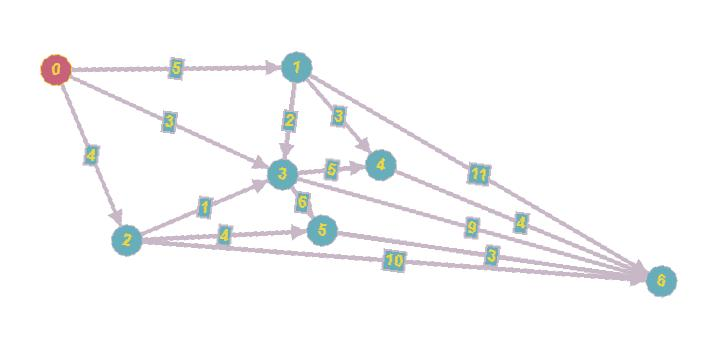

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

##Problema de Asignacion de tarea

In [2]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [3]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)): #n operaciones
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

La función valor tiene orden $O(n)$.

In [4]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)): #n operaciones
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ): #n operaciones
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ]) #n operaciones
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)): #n operaciones
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ): #n operaciones
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ]) #n operaciones
  return VALOR

CI((0,1),COSTES)

68

CI y CS tienen orden $O(n^2)$.

In [5]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ): #n operaciones
    if i not in NODO: #n operaciones
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

La función crear_hijos tiene orden $O(n^2)$.

In [6]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [14]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) ) #n operaciones
  CotaSup = valor(MEJOR_SOLUCION,COSTES) #n operaciones
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } ) #n^2 operaciones

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s'] #n operaciones
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ] #n^3 operaciones

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ] #n operaciones
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ] #n operaciones

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


La función ramificacion_y_poda tiene orden $O(n!)$ ya que el while hace que se repitan las operaciones para tamaños sucesivamente más grandes.

##Descenso del gradiente

In [8]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [9]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

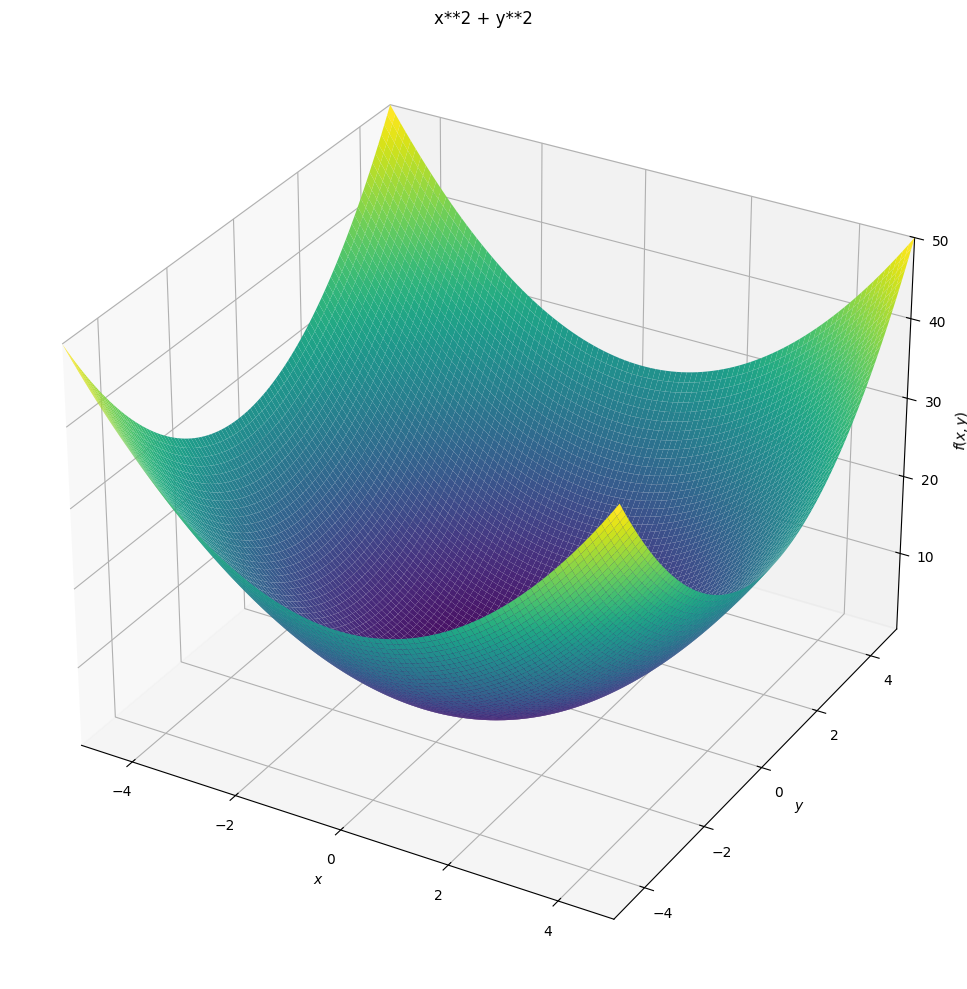

In [10]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

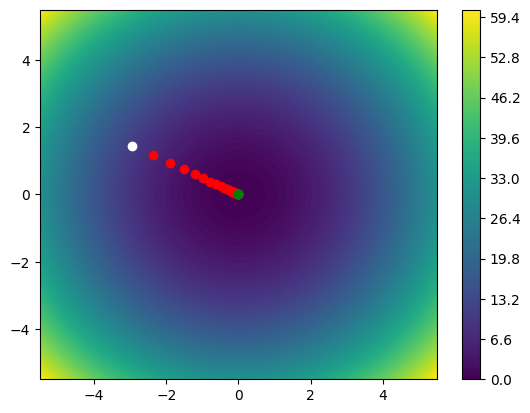

Solucion: [-4.22627725644791e-05, 2.0753265069290508e-05] 2.216839955873121e-09


In [11]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$g(x,y)=sin(\frac{x^2}{2} - \frac{y^2}{4} + 3) * cos(2x + 1 - e^y)$$

$$∇g (x,y) = (xcos(\frac{x^2}{2} - \frac{y^2}{4} + 3)*cos(2x + 1 - e^y)-2sin(\frac{x^2}{2} - \frac{y^2}{4} + 3)*sin(2x + 1 - e^y),~e^ysin(\frac{x^2}{2} - \frac{y^2}{4} + 3)*sin(2x + 1 - e^y)-\frac{y}{2}cos(\frac{x^2}{2} - \frac{y^2}{4} + 3)*cos(2x + 1 - e^y))$$
<br>


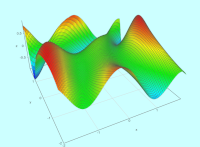


In [41]:
#Definimos la funcion
g= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]))
dg = lambda X: (X[0]*math.cos(1/2*X[0]**2 - 1/4*X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))
    - 2*math.sin(1/2*X[0]**2 - 1/4*X[1]**2 + 3) * math.sin(2*X[0] + 1 - math.exp(X[1])),
    math.exp(X[1]) * math.sin(1/2*X[0]**2 - 1/4*X[1]**2 + 3) * math.sin(2*X[0] + 1 - math.exp(X[1]))
    - 1/2*X[1] * math.cos(1/2*X[0]**2 - 1/4*X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))) #gradiente

dg([1,2])

(-0.8803745550791662, 3.9384502467765357)

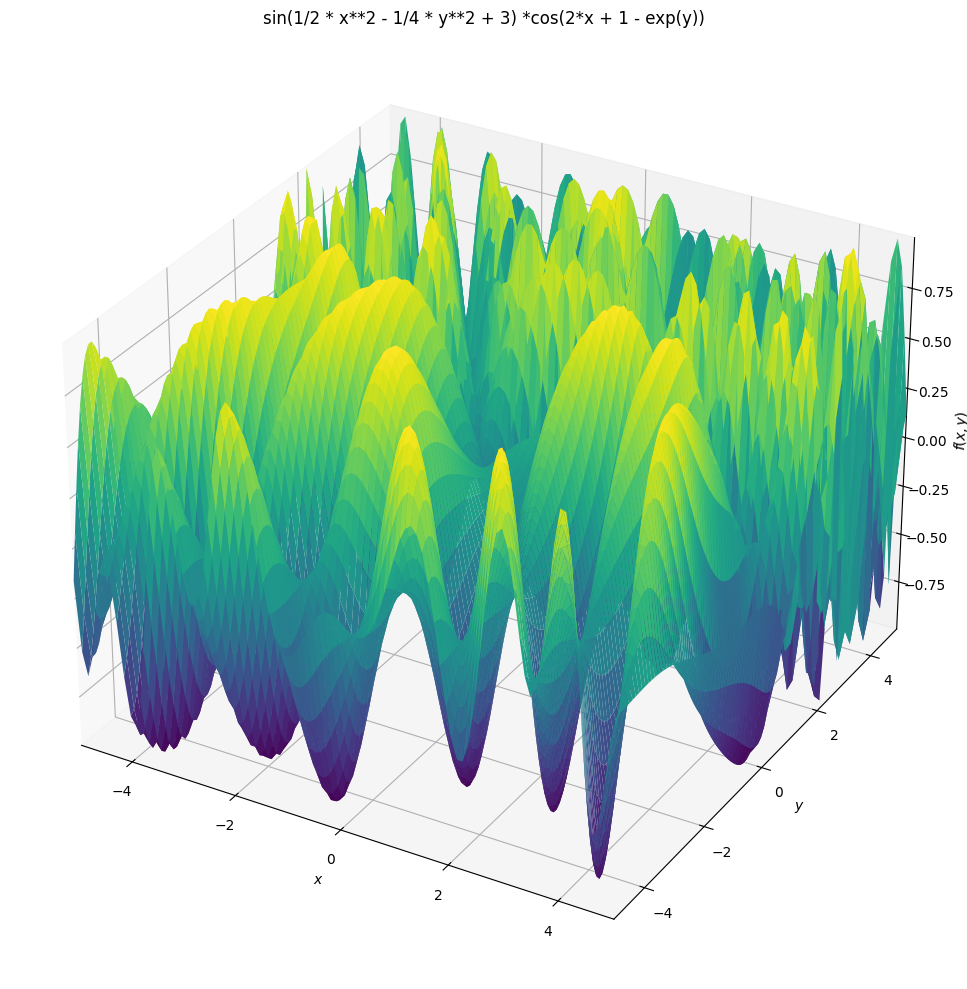

In [46]:
import sympy as sp
x,y = symbols('x y')
plot3d(sp.sin(1/2 * x**2 - 1/4 * y**2 + 3) *sp.cos(2*x + 1 - sp.exp(y)),
       (x,-5,5),(y,-5,5),
       title='sin(1/2 * x**2 - 1/4 * y**2 + 3) *cos(2*x + 1 - exp(y))',
       size=(10,10))

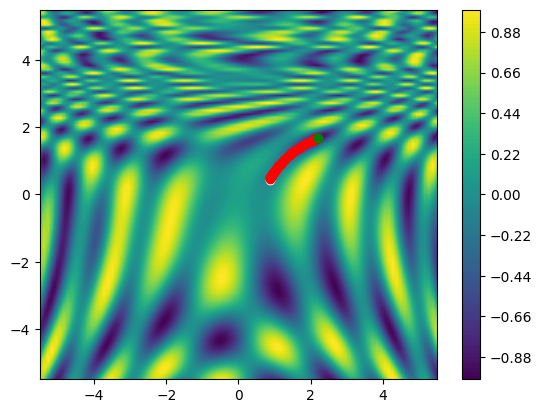

Solucion: [2.1905114656560025, 1.6815610636551597] -0.9997722959701931


In [53]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = g([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = dg(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , g(P))

## Ramificación y poda - Ejercicio extra

In [35]:
import itertools
def fuerza_bruta(COSTES):
    mejor_valor = 10e10
    mejor_solucion = ()

    for s in list(itertools.permutations(range(len(COSTES)))): #n! operaciones (mirar referencia)
        valor_tmp = valor(s, COSTES) #n operaciones
        if valor_tmp < mejor_valor:
            mejor_valor = valor_tmp
            mejor_solucion = s

    print("La mejor solucion es :", mejor_solucion, " con valor:", mejor_valor)


La función fuerza_bruta tiene orden $O(n!)$.

Ejecutemos ambos algoritmos para matrices de distintas dimensiones:

In [26]:
mat5=np.random.randint(50,size=(5,5))
%time fuerza_bruta(mat5)
%time ramificacion_y_poda(mat6)

La mejor solucion es : (4, 0, 1, 2, 3)  con valor: 21
CPU times: user 894 µs, sys: 856 µs, total: 1.75 ms
Wall time: 3.57 ms
La solucion final es: [{'s': (1, 2, 3, 4, 0), 'ci': np.int64(21)}]  en  15  iteraciones  para dimension:  5
CPU times: user 581 µs, sys: 39 µs, total: 620 µs
Wall time: 627 µs


In [27]:
mat6=np.random.randint(50,size=(6,6))
%time fuerza_bruta(mat6)
%time ramificacion_y_poda(mat6)

La mejor solucion es : (3, 2, 0, 4, 1, 5)  con valor: 38
CPU times: user 4.88 ms, sys: 0 ns, total: 4.88 ms
Wall time: 6.77 ms
La solucion final es: [{'s': (2, 3, 1, 0, 4, 5), 'ci': np.int64(40)}]  en  62  iteraciones  para dimension:  6
CPU times: user 3.22 ms, sys: 0 ns, total: 3.22 ms
Wall time: 7.03 ms


In [28]:
mat7=np.random.randint(50,size=(7,7))
%time fuerza_bruta(mat7)
%time ramificacion_y_poda(mat7)

La mejor solucion es : (6, 5, 3, 4, 0, 2, 1)  con valor: 49
CPU times: user 36.5 ms, sys: 0 ns, total: 36.5 ms
Wall time: 108 ms
La solucion final es: [{'s': (4, 6, 5, 2, 3, 1, 0), 'ci': np.int64(49)}]  en  231  iteraciones  para dimension:  7
CPU times: user 19.7 ms, sys: 0 ns, total: 19.7 ms
Wall time: 51.1 ms


In [29]:
mat8=np.random.randint(50,size=(8,8))
%time fuerza_bruta(mat8)
%time ramificacion_y_poda(mat8)

La mejor solucion es : (0, 2, 5, 3, 1, 7, 4, 6)  con valor: 19
CPU times: user 224 ms, sys: 2.37 ms, total: 226 ms
Wall time: 429 ms
La solucion final es: [{'s': (0, 4, 1, 3, 6, 2, 7, 5), 'ci': np.int64(19)}]  en  711  iteraciones  para dimension:  8
CPU times: user 106 ms, sys: 0 ns, total: 106 ms
Wall time: 123 ms


In [30]:
mat9=np.random.randint(50,size=(9,9))
%time fuerza_bruta(mat9)
%time ramificacion_y_poda(mat9)

La mejor solucion es : (3, 0, 7, 5, 4, 6, 1, 8, 2)  con valor: 72
CPU times: user 1.23 s, sys: 29.2 ms, total: 1.26 s
Wall time: 1.26 s
La solucion final es: [{'s': (1, 6, 7, 0, 4, 3, 5, 2, 8), 'ci': np.int64(84)}]  en  6528  iteraciones  para dimension:  9
CPU times: user 4.22 s, sys: 7.4 ms, total: 4.23 s
Wall time: 4.33 s


In [31]:
mat10=np.random.randint(50,size=(10,10))
%time fuerza_bruta(mat10)
%time ramificacion_y_poda(mat10)

La mejor solucion es : (1, 2, 9, 5, 7, 8, 0, 6, 4, 3)  con valor: 47
CPU times: user 23.4 s, sys: 424 ms, total: 23.9 s
Wall time: 31.1 s
La solucion final es: [{'s': (6, 0, 1, 9, 4, 8, 7, 3, 5, 2), 'ci': np.int64(49)}]  en  41843  iteraciones  para dimension:  10
CPU times: user 4min 57s, sys: 258 ms, total: 4min 58s
Wall time: 5min 26s


In [34]:
mat11=np.random.randint(50,size=(11,11))
%time fuerza_bruta(mat11)

La mejor solucion es : (5, 6, 3, 10, 4, 2, 1, 0, 7, 9, 8)  con valor: 40
CPU times: user 2min 51s, sys: 3.67 s, total: 2min 54s
Wall time: 3min 2s


Podemos ver como a partir de matrices 9x9 el algoritmo de ramificación y poda se vuelve más lento que el de fuerza bruta, además, a partir de este tamaño ambos algoritmos se vuelven bastante lentos.

Por otro lado, es a partir de tamaño 10x10 cuando el algoritmo de ramificación y poda deja de ser una opción, mientras que el de fuerza bruta deja de serlo a partir de tamaño 11x11. Esto es debido al orden de los algoritmos, siendo ambos de $O(n!)$ pero habiendo una mayor cantidad de operaciones dentro de el de ramificación y poda que hacen que escalen más rápido el número de operaciones

##Referencias

https://www.datacamp.com/es/tutorial/big-o-notation-time-complexity